In [3]:
import sys
import numpy as np
import cv2
from time import sleep
from datetime import datetime
import os
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv, read_excel, DataFrame
import matplotlib.pyplot as plt
import logging
logging.basicConfig(level=logging.INFO)
p = os.path.join('C:\\Users\\joaquin','usda','raw','CookIRCamET','Meteorological','Cprl')
p2 = os.path.join('C:\\Users\\joaquin','usda','work','CookIRCamET','Inputs','Cprl')

In [53]:
cprl_weather = read_csv(os.path.join(p,'15-min_SWMRU_CPRL_weather_data_2016.csv'),na_values='NaN',skiprows=[1])
cprl_weather = cprl_weather.merge(read_csv(os.path.join(p,'15-min_SWMRU_CPRL_weather_data_2016_aux.csv'),na_values='NaN',skiprows=[1]), how='inner',right_on=['Year','DOY','Time'],left_on=['Year','DOY','Time'])

cprl_sensors = read_csv(os.path.join(p,'TSEB_Crop_Sensors.csv'),na_values='NaN',skiprows=[1])

cprl_crop = read_csv(os.path.join(p,'TSEB_Crop_Daily.csv'),na_values='NaN',skiprows=[1])

cprl_params_0 = read_csv(os.path.join(p,'TSEB_Crop_Seasonal.csv'),na_values='NaN')

cprl_params_1 = read_csv(os.path.join(p,'TSEB_Constants.csv'),na_values='NaN')

In [54]:
cprl_ts = cprl_weather.merge(cprl_crop, how='outer',right_on=['Year','DOY'],left_on=['Year','DOY'])

In [55]:
cprl_ts.columns

Index(['Decimal_DOY_x', 'Year', 'DOY', 'Time', 'Solar_irradiance', 'RH',
       'Air_temperature', 'Wind_speed', 'Mean_Precip_from_4_lysimeters',
       'NE_Lys._Precip.', 'SE_Lys._Precip.', 'NW_Lys._Precip.',
       'SW_Lys._Precip.', 'Decimal_DOY_y', 'Tair_ht', 'Tair_hc', 'Hm_Opt',
       'Hm_ht', 'Hm_hc', 'Windsp_ht', 'Wind_dir', 'Wind_dir_ht', 'Wind_hc',
       'BP', 'Prec_SW_Lys', 'Irrig', 'fSoilWetIrrig', 'IrrigEvent_flag',
       'Soil_albedo_dry_vis', 'Soil_albedo_dry_nir', 'Soil_albedo_wet_vis',
       'Soil_albedo_wet_nir', 'REW', 'TEW', 'Kemax', 'Kcmax', 'XE',
       'Leaf_abs_vis', 'Leaf_abs_nir', 'wc', 'hc', 'LAI', 'fGLAI',
       'Leaf_size_s'],
      dtype='object')

In [70]:
cprl_merge = cprl_ts[['Year','DOY','Time','Solar_irradiance','Air_temperature','RH','Wind_speed','Mean_Precip_from_4_lysimeters','Irrig','BP', 'wc', 'hc', 'LAI',
       'Leaf_size_s']]

In [71]:
cprl_merge = cprl_merge.rename(columns={'Solar_irradiance':'Sd','Air_temperature':'Ta','Wind_speed':'u_z','Mean_Precip_from_4_lysimeters':'Precip'})

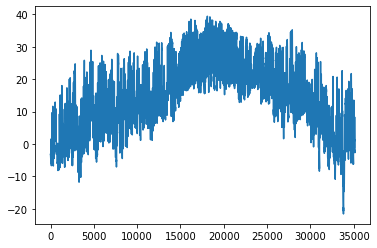